# Character Entropy

In this notebook, you will learn about information entropy and how to compute it for discrete probability distributions.

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from ipywidgets import interact

## Character counting and entropy

Write a function, `char_probs`, that takes a string and computes the probabilities of each character in the string:

* First do a character count and store the result in a dictionary.
* Then divide each character count by the total number of character to compute the normalized probabilties.
* Return the dictionary of characters (keys) and probabilities (values).

In [3]:
def char_probs(s):
    """Find the probabilities of the unique characters in the string s.
    
    Parameters
    ----------
    s : str
        A string of characters.
    
    Returns
    -------
    probs : dict
        A dictionary whose keys are the unique characters in s and whose values
        are the probabilities of those characters.
    """
    probs = {}
    length = len(s)
    for i in s:
        if i not in probs:
            probs[i] = 1 / length
        else:
            probs[i] += 1 / length
    return probs


In [4]:
test1 = char_probs('aaaa')
assert np.allclose(test1['a'], 1.0)
test2 = char_probs('aabb')
assert np.allclose(test2['a'], 0.5)
assert np.allclose(test2['b'], 0.5)
test3 = char_probs('abcd')
assert np.allclose(test3['a'], 0.25)
assert np.allclose(test3['b'], 0.25)
assert np.allclose(test3['c'], 0.25)
assert np.allclose(test3['d'], 0.25)

The [entropy](http://en.wikipedia.org/wiki/Entropy_%28information_theory%29) is a quantiative measure of the disorder of a probability distribution. It is used extensively in Physics, Statistics, Machine Learning, Computer Science and Information Science. Given a set of probabilities $P_{i}$, the entropy is defined as:

$$H = - \Sigma_i P_i \log_2(P_i)$$ 

In this expression $\log_2$ is the base 2 log (`np.log2`), which is commonly used in information science. In Physics the natural log is often used in the definition of entropy.

Write a funtion, `entropy`, that computes the entropy of a probability distribution. The probability distribution will be passed as a Python `dict`. The keys in the `dict` will be the unique values in the distribution and the values in the `dict` will be the probabilities for those keys.

To compute the entropy, you should:

* First convert the values (probabilities) of the `dict` to a Numpy array of probabilities.
* Then use other Numpy functions (`np.log2`, etc.) to compute the entropy.
* Don't use any `for` or `while` loops in your code.

In [5]:
def entropy(d):
    """Compute the entropy of a dict d whose values are probabilities."""
    y = list(d.values())
    return(-np.sum(y * np.log2(y)))
entropy({'a': 0.5, 'b': 0.5})

1.0

In [6]:
assert np.allclose(entropy({'a': 0.5, 'b': 0.5}), 1.0)
assert np.allclose(entropy({'a': 1.0}), 0.0)

Use IPython's `interact` function to create a user interface that allows you to type a string into a text box and see the entropy of the character probabilities of the string. Try to get an intuitive sense of the entropy by typing in different strings. What strings make the entropy large? Small?

In [7]:
def calc_entropy(s):
    return(entropy(char_probs(s)))

In [8]:
interact(calc_entropy,s="hi there!");

2.725480556997868

Find the entropies of the all of the books in the directory `/data/gutenberg`:

In [9]:
my_files = !ls /data/gutenberg/*.txt
num_files = len(my_files)
x = []
for i in my_files:
    f = open(i,'r')
    x.append(f.read())
entropies = []
for i in range(num_files):
    entropies.append(calc_entropy(x[i]))


In [10]:
entropies

[4.5902126544822925,
 4.4751575020186376,
 4.491005759801161,
 4.4927752059061321,
 4.5216259492152195,
 4.4755281131951454,
 4.5065546838284156,
 4.5508628076456645,
 4.4406132063456143,
 4.4085227388434358]

* Store your entropies in a list
* Create an appropriately labeled visualization of the distribution of entropies
* Print the mean entropy

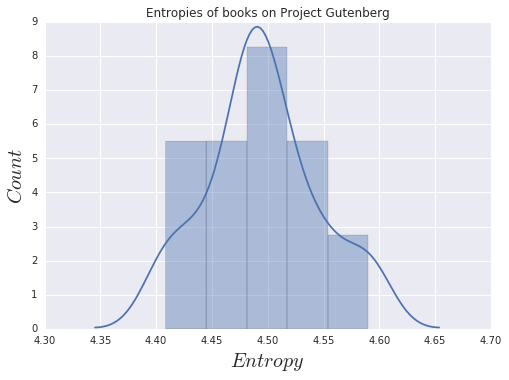

In [11]:
sns.distplot(entropies,kde = True)
plt.ylabel("$Count$", size = 20)
plt.xlabel("$Entropy$", size = 20)
plt.title("Entropies of books on Project Gutenberg");

In [12]:
print(np.mean(entropies))

4.49528586213
